In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
from IPython import display

In [30]:
display.set_matplotlib_formats("svg")

C:\Users\MinhPhu\AppData\Local\Temp\ipykernel_19796\3793039605.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


In [31]:
def function(x): 
    return 3*x**2 - 3*x + 4
def grad(x): 
    return 6*x - 3

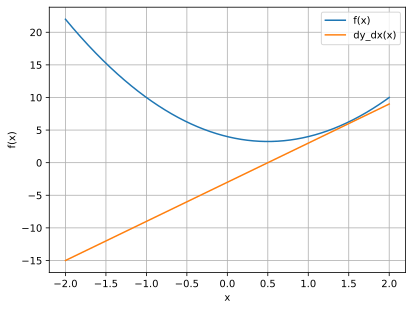

In [32]:
x = np.linspace(-2, 2, 2001)
y = function(x)
plt.plot(x, y, x, grad(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'dy_dx(x)'])
plt.show()

In [44]:
ran_localmin = np.random.choice(x, 1) 
print(ran_localmin)
lr = 0.01 
epochs = 100 
for i in range(epochs): 
    dy_dx = grad(ran_localmin)
    ran_localmin = ran_localmin - lr * dy_dx
print(ran_localmin)
y = function(ran_localmin)
print(y) 

[1.176]
[0.5013891]
[3.25000579]


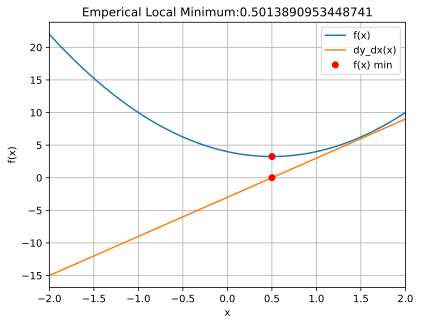

In [45]:
plt.plot(x, function(x), x, grad(x))
plt.plot(ran_localmin, grad(ran_localmin), 'ro')
plt.plot(ran_localmin, function(ran_localmin), 'ro')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'dy_dx(x)', 'f(x) min'])
plt.xlim(x[[0,-1]])
plt.title(f"Emperical Local Minimum:{ran_localmin[0]}")
plt.show()

# Store model parameters

In [71]:
ran_localmin = np.random.choice(x, 1)[0]
print(ran_localmin)
lr = 0.01 
epochs = 1000 
model_parameters = np.zeros((epochs, 2))
for i in range(epochs): 
    dy_dx = grad(ran_localmin)
    ran_localmin = ran_localmin - lr * dy_dx
    model_parameters[i, :] = [ran_localmin, dy_dx]
print(model_parameters[-1])

-1.3119999999999998
[ 5.00000000e-01 -2.66453526e-15]


# Visualize gradients over epochs 

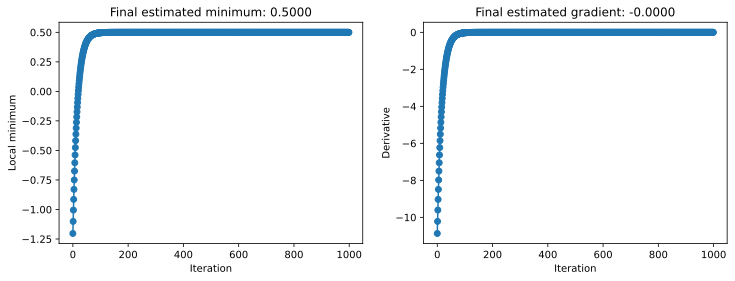

In [72]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
titles = [f"Final estimated minimum: {ran_localmin:.4f}", f"Final estimated gradient: {dy_dx:.4f}"]
for i in range(2): 
    ax[i].plot(model_parameters[:,i], 'o-')
    ax[i].set_xlabel("Iteration")
    ax[i].set_title(f"{titles[i]}")
ax[0].set_ylabel("Local minimum")
ax[1].set_ylabel("Derivative")
plt.show()

# Khi set lr nhỏ hơn, ta cần có epochs lớn hơn để có thể tiếp cận cực tiểu 